# Τεχνικές Εξόρυξης Δεδομένων - Εργασία 2
---
Goodreads

Εισάγουμε τις κατάλληλες βιβλιοθήκες στον κώδικα

In [1]:
# Pandas Library
import pandas as pd

# Abstract Syntax Tree
import ast

# Matplotlib
import matplotlib.pyplot as plt

# Gensim
import gensim

# Natural Language Toolkit
import nltk

# String Library
import string

# Numpy
import numpy as np

# Pickle
import pickle

# Regular Expression
import re

'''
 SciKit library
'''
# TF-IDF Vectorizer from feature_extraction.text package
from sklearn.feature_extraction.text import TfidfVectorizer

# Cosine Similarity from metrics.pairwise package
from sklearn.metrics.pairwise import cosine_similarity

# Train-Test split from model selection package
from sklearn.model_selection import train_test_split

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# SVC from SVM package
from sklearn.svm import SVC

# Random Forest Classifier from ensemble package
from sklearn.ensemble import RandomForestClassifier

# Grid Search from model selection package
from sklearn.model_selection import GridSearchCV

# Some metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Cross validation score
from sklearn.model_selection import cross_val_score

Διαβάζουμε το books_1.Best_Books_Ever.csv αρχείο και επιτρέπουμε να φαίνονται όλες οι στήλες ώστε να μπορούμε να τις χρησιμοποιήσουμε για να λύσουμε τα ζητούμενα.

In [2]:
# Reading the csv file
df = pd.read_csv("books_1.Best_Books_Ever.csv")

# Allowing all columns to be displayed
pd.set_option('display.max_columns', None)

df

,bookId,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,edition,pages,publisher,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,Scholastic Press,09/14/08,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,US Edition,870,Scholastic Inc.,09/28/04,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,NaN,324,Harper Perennial Modern Classics,05/23/06,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,"Modern Library Classics, USA / CAN",279,Modern Library,10/10/00,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,NaN,501,"Little, Brown and Company",09/06/06,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52473,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2940012616562,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",[],Nook,NaN,0,Cheri Schmidt,May 28th 2011,NaN,[],871,"['311', '310', '197', '42', '11']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52474,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,9999999999999,"['Mystery', 'Young Adult']",[],Paperback,First Edition,190,Bokheim Publishing,August 5th 2011,August 3rd 2011,[],37,"['16', '14', '5', '2', '0']",95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52475,10815662-marked,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2

## Ζητούμενο 1 - Προεπεξεργασία
---

Παρατηρήστε την στήλη ratingsByStars, περιέχει 5 τιμές χωρισμένες με κόμματα , χωρίστε τις
τιμές αυτές και προσθέστε στο dataframe ξεχωριστά τα ratings, δηλαδή ratingStar5, ratingStar4,
ratingStar3 κτλ.

Θα διαγράψουμε όλες τις πλειάδες όπου δεν υπάρχουν ratingsByStars.

In [3]:
# Dropping all empty lists from ratingsByStars
df=df[df['ratingsByStars'] != '[]']

# Show the dataframe
df

,bookId,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,edition,pages,publisher,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,Scholastic Press,09/14/08,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,US Edition,870,Scholastic Inc.,09/28/04,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,NaN,324,Harper Perennial Modern Classics,05/23/06,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,"Modern Library Classics, USA / CAN",279,Modern Library,10/10/00,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,NaN,501,"Little, Brown and Company",09/06/06,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52473,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2940012616562,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",[],Nook,NaN,0,Cheri Schmidt,May 28th 2011,NaN,[],871,"['311', '310', '197', '42', '11']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52474,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,9999999999999,"['Mystery', 'Young Adult']",[],Paperback,First Edition,190,Bokheim Publishing,August 5th 2011,August 3rd 2011,[],37,"['16', '14', '5', '2', '0']",95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52475,10815662-marked,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2



Θα χρησιμοποιήσουμε την pd.Series() μέθοδο με την βοήθεια της df.apply() ώστε να χωρίσουμε την στήλη ratingByStars εφόσον τα στοιχεία έιναι τύπου list.

In [4]:
# define function to remove non-numeric characters from a string
def remove_non_numeric(s):
    return ''.join(filter(str.isdigit, s))

# use apply() and pd.Series() to split the strings into separate columns
df_split = df['ratingsByStars'].apply((lambda x: pd.Series(str(x).split(","))))

# apply function to each element in the 'ratingsByStars' column
df_split=df_split.apply((lambda lst: [remove_non_numeric(s) for s in lst]))

# rename the columns
new_column_names = {0: 'ratingStar5', 1: 'ratingStar4', 2: 'ratingStar3', 3: 'ratingStar2', 4: 'ratingStar1'}
df_split = df_split.rename(columns=new_column_names)

# join the split columns back to the original dataframe
df = df.drop('ratingsByStars', axis=1).join(df_split)

df

,bookId,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,edition,pages,publisher,publishDate,firstPublishDate,awards,numRatings,likedPercent,setting,coverImg,bbeScore,bbeVotes,price,ratingStar5,ratingStar4,ratingStar3,ratingStar2,ratingStar1
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,Scholastic Press,09/14/08,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09,3444695,1921313,745221,171994,93557
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,US Edition,870,Scholastic Inc.,09/28/04,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38,1593642,637516,222366,39573,14526
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,NaN,324,Harper Perennial Modern Classics,05/23/06,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN,2363896,1333153,573280,149952,80794
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,"Modern Library Classics, USA / CAN",279,Modern Library,10/10/00,01/28/13,[],2998241,94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN,1617567,816659,373311,113934,76770
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,NaN,501,"Little, Brown and Company",09/06/06,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1,1751460,1113682,1008686,542017,548674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52473,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2940012616562,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",[],Nook,NaN,0,Cheri Schmidt,May 28th 2011,NaN,[],871,94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN,311,310,197,42,11
52474,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,9999999999999,"['Mystery', 'Young Adult']",[],Paperback,First Edition,190,Bokheim Publishing,August 5th 2011,August 3rd 2011,[],37,95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN,16,14,5,2,0
52475,10815662-marked,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,9781461017097,"['Fantasy', 'Youn

Επίσης η στήλη genres περιέχει για κάθε βιβλίο περισσότερα από ένα genre (είδος).
Δημιουργήστε μία νέα στήλη (ονομάστε την genreSingle) και βάλτε μόνο το πρώτο genre από
όλα τα genres που συναντάμε σε κάθε γραμμή. (πχ ['Fantasy', 'Young Adult', 'Fiction', 'Magic',
'Childrens', 'Adventure', 'Audiobook', 'Middle Grade', 'Classics', 'Science Fiction Fantasy'] -> η
νέα στήλη θα έχει το 'Fantasy' ) deleting books without any genre information.

In [5]:
# converting the genre column to a list in a temporary column as it is a string
df['temp'] = df['genres'].apply(ast.literal_eval)

# create new column 'genreSingle' containing the first element of each list in 'col1'
df['genreSingle'] = df['temp'].str[0]

# deleting the temporary column
df=df.drop('temp', axis=1)

# dropping the rows without any genre information
df=df[df['genres'] != '[]']

df

,bookId,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,edition,pages,publisher,publishDate,firstPublishDate,awards,numRatings,likedPercent,setting,coverImg,bbeScore,bbeVotes,price,ratingStar5,ratingStar4,ratingStar3,ratingStar2,ratingStar1,genreSingle
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,Scholastic Press,09/14/08,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09,3444695,1921313,745221,171994,93557,Young Adult
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,US Edition,870,Scholastic Inc.,09/28/04,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38,1593642,637516,222366,39573,14526,Fantasy
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,NaN,324,Harper Perennial Modern Classics,05/23/06,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN,2363896,1333153,573280,149952,80794,Classics
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,"Modern Library Classics, USA / CAN",279,Modern Library,10/10/00,01/28/13,[],2998241,94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN,1617567,816659,373311,113934,76770,Classics
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,NaN,501,"Little, Brown and Company",09/06/06,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1,1751460,1113682,1008686,542017,548674,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52473,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2940012616562,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",[],Nook,NaN,0,Cheri Schmidt,May 28th 2011,NaN,[],871,94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN,311,310,197,42,11,Vampires
52474,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,9999999999999,"['Mystery', 'Young Adult']",[],Paperback,First Edition,190,Bokheim Publishing,August 5th 2011,August 3rd 2011,[],37,95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN,16,14,5,2,0,Mystery
52475,10815662-marked,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READE

Χρησιμοποιήστε την στήλη publishDate και δημιουργήστε μία νέα στήλη με το έτος έκδοσης κάθε
βιβλίου (μπορείτε να χρησιμοποιήστε την μέθοδο to_datetime() που παρέχει το pandas ή ότι
άλλο θέλετε).

In [7]:
'''
Must be executed twice to have the correct result, years appear as decimals 
'''

# convert date column to datetime in a temporary column
df['temp'] = pd.to_datetime(df['publishDate'], format="mixed", errors='coerce')

# retreive only the year from the temporary datetime column
df['publishYear'] = df['temp'].dt.year

# dropping the columns with NaN elements that were created after the new column
df = df.dropna(subset='publishYear')

# deleting the temporary column
df=df.drop('temp', axis=1)

df

,bookId,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,edition,pages,publisher,publishDate,firstPublishDate,awards,numRatings,likedPercent,setting,coverImg,bbeScore,bbeVotes,price,ratingStar5,ratingStar4,ratingStar3,ratingStar2,ratingStar1,genreSingle,publishYear
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,Scholastic Press,09/14/08,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09,3444695,1921313,745221,171994,93557,Young Adult,2008
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,US Edition,870,Scholastic Inc.,09/28/04,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38,1593642,637516,222366,39573,14526,Fantasy,2004
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,NaN,324,Harper Perennial Modern Classics,05/23/06,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN,2363896,1333153,573280,149952,80794,Classics,2006
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,"Modern Library Classics, USA / CAN",279,Modern Library,10/10/00,01/28/13,[],2998241,94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN,1617567,816659,373311,113934,76770,Classics,2000
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,NaN,501,"Little, Brown and Company",09/06/06,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1,1751460,1113682,1008686,542017,548674,Young Adult,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52473,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2940012616562,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",[],Nook,NaN,0,Cheri Schmidt,May 28th 2011,NaN,[],871,94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN,311,310,197,42,11,Vampires,2011
52474,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,9999999999999,"['Mystery', 'Young Adult']",[],Paperback,First Edition,190,Bokheim Publishing,August 5th 2011,August 3rd 2011,[],37,95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN,16,14,5,2,0,Mystery,2011
52475,10815662-marked,Marked,Soul Guardian

## Ζητούμενο 2 - 5 Ερωτήματα για μελέτη των δεδομένων 
---
1. Κατασκευάστε το ιστόγραμμα των ratings στο σύνολο δεδομένων (χρησιμοποιήστε την
στήλη rating).

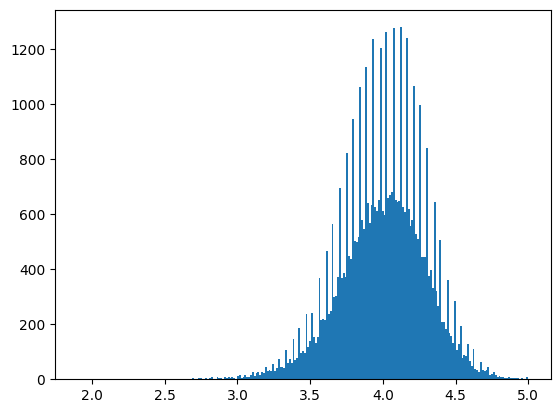

In [8]:
# plot the histogram
plt.hist(df['rating'], bins=len(df['rating'].unique()))

# show the plot
plt.show()


2. Ποιά είναι τα 10 βιβλία με τις περισσότερες σελίδες;

Παρατηρούμε ότι η στήλη pages έχει δεδομένα τύπου string.

In [9]:
df['pages'].dtype

dtype('O')



Αρχικά θα μετατρέψουμε τα pages από συμβολοσειρές σε integers. Έπειτα, θα ταξινομήσουμε το dataframe άνα φθίνοντα αριθμό σελιδών και θα πάρουμε τις πρώτες 10 σειρές του dataframe. 

In [10]:
# Copying the dataframe
df_copy = df.copy()

# Dropping the pages NaN values from the dataframe
df_copy = df_copy.dropna(subset='pages')

# Removing non-numeric characters from the pages column
df_copy['pages'] = df_copy['pages'].apply(lambda x: re.sub(r'\D', '', x))

# Converting the pages column to integers
df_copy['pages'] = df_copy['pages'].astype(int)

# Sorting the dataframe by the number of pages
df_sorted = df_copy.sort_values('pages', ascending=False)

# extract the top 10 rows from the sorted dataframe
top_rows = df_sorted.head(10)

# show the results
top_rows

,bookId,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,edition,pages,publisher,publishDate,firstPublishDate,awards,numRatings,likedPercent,setting,coverImg,bbeScore,bbeVotes,price,ratingStar5,ratingStar4,ratingStar3,ratingStar2,ratingStar1,genreSingle,publishYear
11490,78159.The_Story_of_Civilization,The Story of Civilization,The Story of Civilization #1-11,"Will Durant, Ariel Durant",4.43,The STORY OF CIVILIZATION by Will Durant repre...,English,9781567310238,"['History', 'Nonfiction', 'Philosophy', 'World...",[],Paperback,NaN,14777,MJF Books,June 1st 1993,10/29/75,[],1506,97.0,[],https://i.gr-assets.com/images/S/compressed.ph...,198,2,421.87,924,374,159,29,20,History,1993
22960,22429484-the-complete-wheel-of-time,The Complete Wheel of Time,The Wheel of Time #omnibus,"Robert Jordan, Brandon Sanderson (Goodreads Au...",4.61,Written by Robert Jordan and completed posthum...,English,9780765376862,"['Fantasy', 'Fiction', 'Epic Fantasy', 'High F...",[],ebook,NaN,11095,TOR,May 2014,NaN,[],2979,98.0,[],https://i.gr-assets.com/images/S/compressed.ph...,99,1,121.06,2136,618,164,39,22,Fantasy,2014
8374,20345548-the-complete-malazan-book-of-the-fallen,The Complete Malazan Book of the Fallen,Malazan Book of the Fallen #1-10,Steven Erikson (Goodreads Author),4.72,Included in The Malazan Empire collection are ...,English,9780765376855,"['Fantasy', 'Fiction', 'Epic Fantasy', 'Dark F...",[],ebook,NaN,8258,Tor Books,January 28th 2014,NaN,[],1667,97.0,[],https://i.gr-assets.com/images/S/compressed.ph...,298,3,NaN,1362,206,56,23,20,Fantasy,2014
5098,3326828-animorphs,Animorphs,Animorphs #1-54,"K.A. Applegate, Katherine Applegate",4.36,"Animorphs ""RM"" is an exciting series for young...",English,9780590112055,"['Science Fiction', 'Childrens', 'Fiction', 'Y...",[],Paperback,NaN,8245,Hippo Books,December 1997,10/28/97,[],4023,97.0,[],https://i.gr-assets.com/images/S/compressed.ph...,577,6,NaN,2165,1267,490,73,28,Science Fiction,1997
20098,20869872-homestuck,Homestuck,Homestuck ##Webcomic,Andrew Hussie,4.64,It's a story about some kids who are friends o...,English,9999999999999,"['Comics', 'Fantasy', 'Webcomic', 'Science Fic...",[],ebook,Webcomic,8124,Self Published on MSPaintAdventures,April 13th 2016,NaN,[],1494,97.0,[],https://i.gr-assets.com/images/S/compressed.ph...,100,1,NaN,1158,213,71,20,32,Comics,2016
3148,18713259-worm,Worm,Parahumans #1,"Wildbow, J.C. McCrae",4.63,An introverted teenage girl with an unconventi...,English,9999999999999,"['Fantasy', 'Science Fiction', 'Fiction', 'Sup...",[],ebook,NaN,6680,http://parahumans.wordpress.com,November 19th 2013,11/28/13,[],6191,98.0,[],https://i.gr-assets.com/images/S/compressed.ph...,1081,11,NaN,4543,1211,309,76,52,Fantasy,2013
4692,24520.The_Complete_Aubrey_Maturin_Novels,The Complete Aubrey/Maturin Novels (5 Volumes),NaN,Patrick O'Brian,4.70,Patrick O’Brian’s twenty-one-volume Aubrey/Mat...,English,9780393060119,"['Historical Fiction', 'Fiction', 'Literature'...","['Jack Aubrey', 'Stephen Maturin']",Hardcover,NaN,6576,W. W. Norton Company,October 17th 2004,10/28/94,[],1389,98.0,[],https://i.gr-assets.com/images/S/compressed.ph...,646,8,149.99,1083,232,47,12,15,Historical Fiction,2004
14269,6184283,البداية والنهاية,NaN,ابن كثير,4.41,البداية والنهاية في التاريخ هي موسوعة تاريخية ...,Arabic,9999999999999,"['History', 'Religion', 'Islam', 'Nonfiction']",[],NaN,NaN,6088,الدار النموذجية - المطبعة العصرية,2008,10/30/72,[],2132,94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,176,2,NaN,1398,413,188,57,76,History,2008
1679,12177850-a-song-of-ice-and-fire,A Song of Ice and Fire,A Song of Ice and Fire #1-5,George R.R. Martin,4.56,"For the first time, all five novels in the epi...",English,9781780484259,"['Fantasy', 'Fiction', 'Science Fiction Fantas...","['Tyrion Lannister', 'Arya Stark', 'Khal Drogo...",Mass Market Paperback,Re-Packaged Edition,5216,Zatpix,July 22nd 2011,10/28/00,[],53233,97.0,[],https://i.gr-assets.com/images/S/compressed.ph...,2616,35,NaN,

3. Ποιά είναι τα 10 βιβλία με τα περισσότερα 5-αστέρια (χρησιμοποιήστε μόνο τα βιβλία που
έχουν λάβει πάνω από 10.000 5-star ratings από τη στήλη ratingStar5) .

Παρατηρούμε ότι η στήλη ratingStar5 έχει δεδομένα τύπου string.

In [11]:
df['ratingStar5'].dtype

dtype('O')

Αρχικά θα μετατρέψουμε τα ratingStar5 από συμβολοσειρές σε integers. Έπειτα, θα ταξινομήσουμε το dataframe άνα φθίνοντα αριθμό βαθμολογιών και θα πάρουμε τις πρώτες 10 σειρές του dataframe. 

In [12]:
# Copying the dataframe
df_copy = df.copy()

# Converting the 5-star-ratings column to integers
df_copy['ratingStar5'] = df_copy['ratingStar5'].astype(int)

# Using only the books that have at least 10000 5-star-ratings
df_copy = df_copy[df_copy['ratingStar5'] > 10000]

# Sorting the dataframe by the number of pages
df_sorted = df_copy.sort_values('ratingStar5', ascending=False)

# extract the top 10 rows from the sorted dataframe
top_rows = df_sorted.head(10)

# show the results
top_rows

,bookId,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,edition,pages,publisher,publishDate,firstPublishDate,awards,numRatings,likedPercent,setting,coverImg,bbeScore,bbeVotes,price,ratingStar5,ratingStar4,ratingStar3,ratingStar2,ratingStar1,genreSingle,publishYear
32,3.Harry_Potter_and_the_Sorcerer_s_Stone,Harry Potter and the Sorcerer's Stone,Harry Potter #1,"J.K. Rowling, Mary GrandPré (Illustrator)",4.47,Harry Potter's life is miserable. His parents ...,English,9999999999999,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...","['Draco Malfoy', 'Ron Weasley', 'Petunia Dursl...",Hardcover,Library Edition,309,Scholastic Inc,11/01/03,06/26/97,"[""Mythopoeic Fantasy Award for Children's Lite...",7048471,96.0,"['London, England', 'Hogwarts School of Witchc...",https://i.gr-assets.com/images/S/compressed.ph...,691430,7348,NaN,4578137,1611874,600384,139551,118525,Fantasy,2003
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,Scholastic Press,09/14/08,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09,3444695,1921313,745221,171994,93557,Young Adult,2008
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,NaN,324,Harper Perennial Modern Classics,05/23/06,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN,2363896,1333153,573280,149952,80794,Classics,2006
71,136251.Harry_Potter_and_the_Deathly_Hallows,Harry Potter and the Deathly Hallows,Harry Potter #7,J.K. Rowling,4.62,Harry Potter is leaving Privet Drive for the l...,English,9780545010221,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Hardcover,First American Edition,759,Arthur A. Levine Books / Scholastic Inc.,07/21/07,NaN,['Locus Award Nominee for Best Young Adult Nov...,2811637,98.0,"['London, England', 'Hogwarts School of Witchc...",https://i.gr-assets.com/images/S/compressed.ph...,351347,3835,2.85,2038930,552014,161906,35042,23745,Fantasy,2007
93,5.Harry_Potter_and_the_Prisoner_of_Azkaban,Harry Potter and the Prisoner of Azkaban,Harry Potter #3,"J.K. Rowling, Mary GrandPré (Illustrator)",4.57,Harry Potter's third year at Hogwarts is full ...,English,9780439655484,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Mass Market Paperback,NaN,435,Scholastic Inc.,05/01/04,07/08/99,['Bram Stoker Award for Best Work for Young Re...,2806471,99.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,247736,2770,5.94,1892635,668920,205266,27227,12423,Fantasy,2004
10,11870085-the-fault-in-our-stars,The Fault in Our Stars,NaN,John Green (Goodreads Author),4.21,Despite the tumor-shrinking medical miracle th...,English,9999999999999,"['Young Adult', 'Romance', 'Fiction', 'Contemp...","['Hazel Grace Lancaster', 'Augustus Waters', '...",Hardcover,NaN,313,Dutton Books,01/10/12,NaN,"['Georgia Peach Book Award (2013)', 'Buxtehude...",3550714,93.0,"['Indianapolis, Indiana (United States)', 'Ams...",https://i.gr-assets.com/images/S/compressed.ph...,1087056,11287,NaN,1784471,1022406,512574,150365,80898,Young Adult,2012
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Va

8. Ποιές είναι οι πιο συχνές γλώσσες που έχουν γραφτεί τα βιβλία στα δεδομένα σας;

In [13]:
# Print the top 27 languages sorted by the amount of books that have been written in that language
print(df['language'].value_counts().head(27))

language
English                  39280
Arabic                     783
Spanish                    541
French                     518
German                     423
Indonesian                 317
Portuguese                 304
Italian                    224
Dutch                      203
Turkish                    175
Polish                     129
Persian                    121
Greek, Modern (1453-)       93
Japanese                    90
Russian                     85
Romanian                    79
Swedish                     73
Bengali                     69
Bulgarian                   55
Danish                      54
Malay                       52
Finnish                     50
Czech                       43
Lithuanian                  38
Filipino; Pilipino          37
Urdu                        32
Norwegian                   32
Name: count, dtype: int64


13.Πόσα βιβλία εκδίδονται ανά έτος;

In [14]:
# Print the years sorted by the amount of books that have been published in that year
print(df['publishYear'].value_counts())

publishYear
2012    3003
2013    2911
2011    2717
2014    2611
2006    2527
        ... 
1928       1
1896       1
1911       1
1873       1
1906       1
Name: count, Length: 121, dtype: int64


## Ζητούμενο 3 - Υλοποίηση Recommendation system
---
Ο στόχος ενός τέτοιου συστήματος είναι (1) να προβλέψει τις αξιολογήσεις ενός χρήστη για τα
βιβλία που δεν έχει διαβάσει ακόμα, και (2) να εμφανίσει ένα ταξινομημένη λίστα με τα κορυφαία
Ν βιβλία για τα οποία πιστεύουμε ότι θα ήθελαν να μάθουν περισσότερα. ‘Ενας άλλος στόχος
ενός Recommender είναι (3) να βοηθήσει τους χρήστες να ανακαλύψουν σχετικά βιβλία που δεν
θα είχαν βρει διαφορετικά.

Σε αυτό το ερώτημα θα χρειαστείτε τις στήλες
- BookId
- Description

Και μόνο όσες γραμμές έχουν γλώσσα “English”. 

Θα επεξεργαστούμε ένα αντίγραφο του dataframe το οποίο θα περιλαμβάνει μόνο τις πλειάδες με Language = English.

In [15]:
# Copying the dataframe
df_copy = df.copy()

# Dropping the rows that contain the books not written in English
df_copy = df_copy[df_copy['language'] == 'English']

# Show the dataframe
df_copy

,bookId,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,edition,pages,publisher,publishDate,firstPublishDate,awards,numRatings,likedPercent,setting,coverImg,bbeScore,bbeVotes,price,ratingStar5,ratingStar4,ratingStar3,ratingStar2,ratingStar1,genreSingle,publishYear
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,Scholastic Press,09/14/08,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09,3444695,1921313,745221,171994,93557,Young Adult,2008
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,US Edition,870,Scholastic Inc.,09/28/04,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38,1593642,637516,222366,39573,14526,Fantasy,2004
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,NaN,324,Harper Perennial Modern Classics,05/23/06,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN,2363896,1333153,573280,149952,80794,Classics,2006
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,"Modern Library Classics, USA / CAN",279,Modern Library,10/10/00,01/28/13,[],2998241,94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN,1617567,816659,373311,113934,76770,Classics,2000
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,NaN,501,"Little, Brown and Company",09/06/06,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1,1751460,1113682,1008686,542017,548674,Young Adult,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52473,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2940012616562,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",[],Nook,NaN,0,Cheri Schmidt,May 28th 2011,NaN,[],871,94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN,311,310,197,42,11,Vampires,2011
52474,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,9999999999999,"['Mystery', 'Young Adult']",[],Paperback,First Edition,190,Bokheim Publishing,August 5th 2011,August 3rd 2011,[],37,95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN,16,14,5,2,0,Mystery,2011
52475,10815662-marked,Marked,Soul Guardian

Έπειτα θα διαγράψουμε τις πλειάδες χωρίς bookId ή description.

In [16]:
# Dropping the books without bookId
df_copy = df_copy.dropna(subset='bookId')

# Dropping the books without description
df_copy = df_copy.dropna(subset='description')

# Show the dataframe
df_copy

,bookId,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,edition,pages,publisher,publishDate,firstPublishDate,awards,numRatings,likedPercent,setting,coverImg,bbeScore,bbeVotes,price,ratingStar5,ratingStar4,ratingStar3,ratingStar2,ratingStar1,genreSingle,publishYear
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,Scholastic Press,09/14/08,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09,3444695,1921313,745221,171994,93557,Young Adult,2008
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,US Edition,870,Scholastic Inc.,09/28/04,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38,1593642,637516,222366,39573,14526,Fantasy,2004
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,NaN,324,Harper Perennial Modern Classics,05/23/06,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN,2363896,1333153,573280,149952,80794,Classics,2006
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",Paperback,"Modern Library Classics, USA / CAN",279,Modern Library,10/10/00,01/28/13,[],2998241,94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN,1617567,816659,373311,113934,76770,Classics,2000
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,NaN,501,"Little, Brown and Company",09/06/06,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1,1751460,1113682,1008686,542017,548674,Young Adult,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52473,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2940012616562,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",[],Nook,NaN,0,Cheri Schmidt,May 28th 2011,NaN,[],871,94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN,311,310,197,42,11,Vampires,2011
52474,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,9999999999999,"['Mystery', 'Young Adult']",[],Paperback,First Edition,190,Bokheim Publishing,August 5th 2011,August 3rd 2011,[],37,95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN,16,14,5,2,0,Mystery,2011
52475,10815662-marked,Marked,Soul Guardian

Δημιουργήστε τον TF-IDF (Term Frequency - Inverse Document Frequency) πίνακα των
unigrams και των bigrams για τη στήλη description (χρησιμοποιήστε την παράμετρο stop_word
του TfidfVectorizer). 

Cosine Similarity: Η μετρική αυτή υπολογίζει την ομοιότητα μεταξύ δύο διανυσμάτων x,y,
χρησιμοποιώντας τη γωνία μεταξύ τους (όταν η γωνία είναι 0 σημαίνει ότι τα x και y είναι ίσα , αν
εξαιρέσουμε το μήκος τους). Διατρέξτε τον TF-IDF πίνακα και υπολογίστε το similarity καθενός
βιβλίου με τα υπόλοιπα. (Μπορεί να προκαλέσει ζημιές σε υπολογιστικά συστήματα) 

In [17]:
# TF-IDF Vectorizing the English books' description column using unigrams
unigram_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,1))
unigram_tfidf_matrix = unigram_vectorizer.fit_transform(df_copy['description'])

# Cosine Similarity between the books in the tfidf matrix produced (each book's description is a vector)
unigram_cosine_sim = cosine_similarity(unigram_tfidf_matrix, unigram_tfidf_matrix)

# TF-IDF Vectorizing the English books' description column using bigrams
bigram_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(2,2))
bigram_tfidf_matrix = bigram_vectorizer.fit_transform(df_copy['description'])

# Cosine Similarity between the books in the tfidf matrix produced (each book's description is a vector)
bigram_cosine_sim = cosine_similarity(bigram_tfidf_matrix, bigram_tfidf_matrix)

Αποθηκεύστε σε ένα python dictionary τα 100 πιο όμοια βιβλία για κάθε βιβλίο (Μπορεί να "γονατίσει" μνήμη RAM μεγέθους 8GB).

In [18]:
'''
    Create a dictionary with the 100most similar books for each book given a cosine similarity matrix for the data 
'''
def create_similar_books_dictionary(cosine_sim):

    # Creating the dictionary
    similar_books = {}

    # Each key in the dictionary is the id/name of the book
    for i, book in enumerate(df_copy['bookId']):

        # Sorting the cosine similarity scores to rank the 100 most similar books with the current book
        sim_scores = list(enumerate(cosine_sim[i]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:101]

        # Retrieving the scores and the indexes of each similar book with the current book
        book_indices = [j[0] for j in sim_scores]
        book_scores = [j[1] for j in sim_scores]
        
        # Each value of the dictionary is a list of tuples containing the similar book and the similar book score
        similar_books[book] = list(zip(df_copy.iloc[book_indices]['bookId'].values.tolist(), book_scores))

    return similar_books

uni_similar_books = create_similar_books_dictionary(unigram_cosine_sim)
bi_similar_books = create_similar_books_dictionary(bigram_cosine_sim)


Πρόβλεψη: Φτιάξτε μία συνάρτηση η οποία παίρνει σαν είσοδο ένα id και ένα ακέραιο αριθμό N,
και επιστρέφει τα Ν πιο όμοια βιβλία.


In [19]:
'''
    Recommnedation function that returns a given number of similar books with the book given. It also prints the results in a fancy way.
'''
def recommend(item_id, num, similar_books):

    # Case the book does not have similar books
    if item_id not in similar_books:
        return None
    
    # Printing the output
    print("Recommending " + str(num) + " books similar to: " + item_id)
    print("---------------------------------------------------------")

    # Retrieving the list of books that are the most similar to the book given
    # The number of books we will retrieve is also given
    resultBooks = similar_books[item_id][:num]

    # Printing the title, the description and the similaity score for each book given
    for book in resultBooks:
        df_row = df_copy.loc[df_copy['bookId'] == book[0]]
        print("Recommended: " + df_row['bookId'].to_string(index=False))
        print("Description: " + df_row['description'].to_string(index=False))
        print("(score: "+ str(book[1]) + ")")
        print()

    # Return the list of books
    return resultBooks

Ας την ελέγξουμε ζητώντας τα 5 πιο όμοια βιβλία με το Harry Potter Collection από τα unigrams.

In [20]:
recommendation = recommend('10.Harry_Potter_Collection', 5, uni_similar_books)

Recommending 5 books similar to: 10.Harry_Potter_Collection
---------------------------------------------------------
Recommended: 15881.Harry_Potter_and_the_Chamber_of_Secrets
Description: Ever since Harry Potter had come home for the s...
(score: 0.37756634783718795)

Recommended: 99298.The_Harry_Potter_Collection_1_4
Description: The exciting tales of Harry Potter, the young w...
(score: 0.3090972523804777)

Recommended: 8.Harry_Potter_Boxed_Set_Books_1_5
Description: Box Set containing Harry Potter and the Sorcere...
(score: 0.2915112151175946)

Recommended: 13799950-turn
Description: Fandom: Harry Potter\nRelationships: Draco Malf...
(score: 0.27867730163085846)

Recommended: 2337379.The_Harry_Potter_trilogy
Description: This box set collects hard cover editions Harry...
(score: 0.2510868417611152)



Ας κάνουμε το ίδιο για το λεξικό με τα bigrams

In [21]:
recommendation = recommend('10.Harry_Potter_Collection', 5, bi_similar_books)

Recommending 5 books similar to: 10.Harry_Potter_Collection
---------------------------------------------------------
Recommended: 8.Harry_Potter_Boxed_Set_Books_1_5
Description: Box Set containing Harry Potter and the Sorcere...
(score: 0.09598250365118648)

Recommended: 26029281-the-unwanteds-complete-collection
Description: Experience the magic of Artimé and the chills o...
(score: 0.09358197351944977)

Recommended: 15881.Harry_Potter_and_the_Chamber_of_Secrets
Description: Ever since Harry Potter had come home for the s...
(score: 0.07634885155554441)

Recommended: 2479827.Eragon_Eldest_Brisingr
Description: WITH THE HIGHLY anticipated publication of Book...
(score: 0.0761078629170977)

Recommended: 14367051-city-of-bones-city-of-ashes-city-of-gl...
Description: The first five books in the #1 New York Times b...
(score: 0.07594866695307936)



Παρατηρούμε ότι τα unigrams βγάζουν πιο μεγάλα σκορ ομοιότητας και καλύτερα αποτελέσματα από τα bigrams. Παρ'όλα αυτά τα αποτελέσματα είναι καλύτερα όταν συνδέουμε τα unigrams και τα bigrams σε ένα σύστημα προτάσεων από ότι να τα έχουμε χώρια. 

## Ζητούμενο 4 - Υλοποίηση Κατηγοριοποίησης (Classification)
---
Χρησιμοποιήστε την στήλη genreSingle, βρείτε τα 10 πιο συχνά genres και κρατήστε σε ένα νέο
dataframe τα βιβλία εκείνα που ανήκουν σε αυτες τις 10 πιο συχνές κατηγορίες.

Πρώτα πρέπει να βρούμε τα 10 πιο συχνά genres και να τα αποθηκεύσουμε σε λίστα.

In [22]:
# Print the top 10 single genres sorted by the amount of books that are classified as this genre primarily
top_genres = list(df['genreSingle'].value_counts().head(10).keys())

Έπειτα πρέπει να φτιάξουμε ένα νέο dataframe με τα βιβλία σε αυτές τις κατηγορίες. Θα χρειαστούμε το bookId το description και το genreSingle. Θα χρησιμοποιήσουμε μόνο βιβλία στα Αγγλικά για λόγους ακριβείας.


In [23]:
# Filter books that belong to top 10 genres
new_df = df[df["genreSingle"].isin(top_genres)]

# Dropping the rows that contain the books not written in English
new_df = new_df[new_df['language'] == 'English']

# We will only need those 3 columns
new_df = new_df[["bookId", "description", "genreSingle"]]

# Show the dataframe
new_df

,bookId,description,genreSingle
0,2767052-the-hunger-games,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,Young Adult
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,There is a door at the end of a silent corrido...,Fantasy
2,2657.To_Kill_a_Mockingbird,The unforgettable novel of a childhood in a sl...,Classics
3,1885.Pride_and_Prejudice,Alternate cover edition of ISBN 9780679783268S...,Classics
4,41865.Twilight,About three things I was absolutely positive.\...,Young Adult
...,...,...,...
52471,12464361-elemental,When seventeen-year-old Kara Nightingale is su...,Fantasy
52472,12395883-unbelievable,Lilah Lopez Dreser's in town to take care of u...,Romance
52474,11836711-anasazi,"'Anasazi', sequel to 'The Thirteenth Chime' by...",Mystery
52475,10815662-marked,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,Fantasy


Έπειτα θα διαγράψουμε τις πλειάδες χωρίς bookId ή description.

In [24]:
# Dropping the books without bookId
new_df = new_df.dropna(subset='bookId')

# Dropping the books without description
new_df = new_df.dropna(subset='description')

# Show the dataframe
new_df

,bookId,description,genreSingle
0,2767052-the-hunger-games,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,Young Adult
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,There is a door at the end of a silent corrido...,Fantasy
2,2657.To_Kill_a_Mockingbird,The unforgettable novel of a childhood in a sl...,Classics
3,1885.Pride_and_Prejudice,Alternate cover edition of ISBN 9780679783268S...,Classics
4,41865.Twilight,About three things I was absolutely positive.\...,Young Adult
...,...,...,...
52471,12464361-elemental,When seventeen-year-old Kara Nightingale is su...,Fantasy
52472,12395883-unbelievable,Lilah Lopez Dreser's in town to take care of u...,Romance
52474,11836711-anasazi,"'Anasazi', sequel to 'The Thirteenth Chime' by...",Mystery
52475,10815662-marked,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,Fantasy



Στην συνέχεια καθαρίστε την στήλη description
χρησιμοποιώντας τις μεθόδους που είδαμε στα φροντιστήρια (πχ αφαίρεση σημείων στίξης,
μετατροπή όλων των χαρακτήρων σε πεζά, κ.α.). 

Θα ορίσουμε μια συνάρτηση καθαρισμού κειμένου.

In [25]:
'''
    Function that clears up a given text from stopwords and returns it as a list of words 
'''
def clean_text(text):

    # Removing all punctuation characters
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Converting all characters to lowercase
    text = text.lower()

    # Using the natural language toolkit to split all stopwords
    stopwords = nltk.corpus.stopwords.words('english')

    # Splitting the text into words and returning them as a list without the stopwords
    words = text.split()
    words = [word for word in words if word not in stopwords]
    return words

Εφαρμόστε την μέθοδο word2vec για τα
descriptions και στην συνέχεια με την χρήση των embeddings να υπολογίσετε για κάθε
description ένα διάνυσμα με 200-300 τιμές (features) - αυτό θα είναι ο μέσος όρος των
embeddings των λέξεων από τις οποίες αποτελείται το description.

In [26]:
# Cleaning the description column
new_df['cleaned_desc'] = new_df['description'].apply(clean_text)

# Creating a word2vec model and calculating the average value of embeddings for each description
model = gensim.models.Word2Vec(new_df['cleaned_desc'], vector_size=300, window=5, min_count=1, workers=4)
new_df['embedding'] = new_df['cleaned_desc'].apply(lambda words: np.mean([model.wv[word] for word in words], axis=0))

# Show the dataframe
new_df

,bookId,description,genreSingle,cleaned_desc,embedding
0,2767052-the-hunger-games,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,Young Adult,"[winning, means, fame, fortunelosing, means, c...","[-0.013802972, 0.37582523, 0.26807198, 0.40078..."
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,There is a door at the end of a silent corrido...,Fantasy,"[door, end, silent, corridor, it’s, haunting, ...","[-0.008755934, 0.39020854, 0.21884896, 0.37158..."
2,2657.To_Kill_a_Mockingbird,The unforgettable novel of a childhood in a sl...,Classics,"[unforgettable, novel, childhood, sleepy, sout...","[-0.016575888, 0.22219455, 0.20850503, 0.36858..."
3,1885.Pride_and_Prejudice,Alternate cover edition of ISBN 9780679783268S...,Classics,"[alternate, cover, edition, isbn, 978067978326...","[0.013089937, 0.1030468, 0.095882, 0.18642685,..."
4,41865.Twilight,About three things I was absolutely positive.\...,Young Adult,"[three, things, absolutely, positive, first, e...","[-0.018745596, 0.36022487, 0.31760815, 0.33488..."
...,...,...,...,...,...
52471,12464361-elemental,When seventeen-year-old Kara Nightingale is su...,Fantasy,"[seventeenyearold, kara, nightingale, suddenly...","[0.10468104, 0.38522023, 0.11849313, 0.2732857..."
52472,12395883-unbelievable,Lilah Lopez Dreser's in town to take care of u...,Romance,"[lilah, lopez, dresers, town, take, care, unfi...","[0.08177984, 0.47388935, 0.14203312, 0.3620841..."
52474,11836711-anasazi,"'Anasazi', sequel to 'The Thirteenth Chime' by...",Mystery,"[anasazi, sequel, thirteenth, chime, emma, mic...","[-0.034512024, 0.6589707, 0.20851128, 0.607036..."
52475,10815662-marked,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,Fantasy,"[readers, favorite, awards, winner, 2011sixtee...","[0.067436635, 0.28311887, 0.023579622, 0.27181..."


Χωρίστε το σύνολο των δεδομένων σε train (80%) και test (20%) χρησιμοποιώντας την μέθοδο
train_test_split() της βιβλιοθήκης sklearn.

In [27]:
# Split dataset into train and test
train_df, test_df = train_test_split(new_df, test_size=0.2)

Χρησιμοποιήστε τη βιβλιοθήκη pickle της Python για να αποθηκεύσετε τα χαρακτηριστικά σε
αρχεία *.pkl . Με αυτό τον τρόπο δεν χρειάζεται να υπολογίζονται από την αρχή τα
χαρακτηριστικά κάθε φορά που τρέχετε το πρόγραμμά σας, αλλά μπορείτε μόνο να τα φορτωνεται
στην μνήμη χρησιμοποιώντας την αντίστοιχη μέθοδο load.


Ο κώδικας αποθήκευσης:

In [28]:
'''
    Function that saves train and test data to separate pickle files 
'''
def save_data_to_pkl(train_df, test_df):

    # Save train embeddings to file
    with open("train_embeddings.pkl", "wb") as f:
        
        # Convert dataframe column with numpy vectors to numpy array
        numpy_array = np.array(train_df["embedding"].tolist())

        # Stack numpy vectors to form a 2D numpy matrix
        matrix = np.stack(numpy_array, axis=0)

        pickle.dump(matrix, f)

    # Save test embeddings to file
    with open("test_embeddings.pkl", "wb") as f:

        # Convert dataframe column with numpy vectors to numpy array
        numpy_array = np.array(test_df["embedding"].tolist())

        # Stack numpy vectors to form a 2D numpy matrix
        matrix = np.stack(numpy_array, axis=0)

        pickle.dump(matrix, f)

Ο κώδικας φόρτωσης:

In [29]:
'''
    Function that loads and returns as a tuple train and test data from separate pickle files 
'''
def load_data_from_pkl():

    # Load train data from a .pkl file
    with open('train_embeddings.pkl', 'rb') as f:
        train_data = pickle.load(f)

    # Load test data from a .pkl file
    with open('test_embeddings.pkl', 'rb') as f:
        test_data = pickle.load(f)
    
    return (train_data, test_data)

Κλήσεις των συναρτήσεων: (Να εκτελεστεί το save σε περίπτωση λάθους).

In [30]:
# Call to save the data in pickle files
save_data_to_pkl(train_df, test_df)

# Call to load the data from pickle files
train_test_tuple = load_data_from_pkl()

Αναθέτουμε τα train και test data σε data και target data. Αυτό θα το κάνουμε μετατρέποντας κάθε genreSingle σε index σε λιστα.

In [31]:
# Assigning training data and test data
X_train = train_test_tuple[0]
X_test = train_test_tuple[1]

'''
    Function that creates a numpy array using a column from a dataframe that has strings
'''
def column_to_numpy(column): 

    # create a list containing all unique elements
    unique_elements = column.unique().tolist()

    # create a dictionary with the elements as keys and their index as values
    element_index = {element: index for index, element in enumerate(unique_elements)}

    # create numpy array of elements indexes
    element_index_array = np.array([element_index[i] for i in column])

    return element_index_array


# Assigning target data as numpy arrays from dataframe columns
Y_train = column_to_numpy(train_df['genreSingle'])
Y_test = column_to_numpy(test_df['genreSingle'])


Σε αυτό το ερώτημα θα πρέπει το πρόγραμμα σας να μπορεί να βρει τις κατηγορίες (genre) του
συνόλου δοκιμής (test) χρησιμοποιώντας τις παρακάτω μεθόδους Classification:
- Naive Bayes
- Support Vector Machines (SVM, να πειραματιστείτε με τις παραμέτρους kernel (rbf, linear), c
και gamma. H επιλογή των παραμέτρων μπορεί να γίνει και με GridSearchCV)
- Random Forests

Ολα τα παραπάνω μοντέλα θα εκπαιδευτούν MONO στο σύνολο train και θα αξιολογηθούν στο
σύνολο test. Ξεκινάμε με το Naive Bayes.

In [32]:
# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the classifier on the training data
clf.fit(X_train, Y_train)

# Predict labels for the test data
Y_pred = clf.predict(X_test)

# Print accuracy
print('Accuracy of GaussianNB classifier on test set: {:.6f}'.format(clf.score(X_test, Y_test)))

Accuracy of GaussianNB classifier on test set: 0.085098


Συνεχίζουμε με την εκπαίδευση SVM. Σε αυτή την περίπτωση πρέπει να συγκρίνουμε τις τιμές για τις παραμέτρους kernel, C και gamma. Η τιμή του kernel θα είναι είτε linear είτε με rbf.

Εδώ είναι η συνάρτηση που θα εκπαιδέυουμε και θα ελέγχουμε τα δεδομένα για το SVM

In [33]:
'''
    Function that trains and tests a given set of data (X_train, y_train)-(X_test, y_test) using SVM 
    SVM is being affected by the kernel, C and gamma parameters given
    Prints the accuracy of both the training and test data 
'''
def svm_train(X_train, y_train, X_test, y_test, svm_kernel, svm_c, svm_gamma):
    
    # Create an instance of SVM classifier
    svm = SVC(kernel=svm_kernel, C=svm_c, gamma=svm_gamma)

    # Train the SVM classifier on the training set
    svm.fit(X_train, y_train)

    # Calculate and print the mean accuracy of the test data
    test_accuracy = svm.score(X_test, y_test)
    print('accuracy of test data:', test_accuracy)

Θα βρούμε τις καλύτερες τιμές των kernel, C και gamma υλοποιώντας GridSearchCV. Το rbf είναι καλύτερο από το linear λόγω της ελαστικότητάς του, ικανότητάς του στο να παίρνει μη γραμμικές αποφάσεις. Λόγω μεγάλων χρόνων στο GridSearch και στο 10-fold Cross Validation παρακάτω, δεν ελέγχθηκε το SVM με linear kernel function. Οι παράμετροι στο GridSearch επιλέχθηκαν με βάση το optimization χρόνου-αποτελεσματικοτητας.

In [34]:
# Creating a new instance of SVM with rbf kernel
svm = SVC(kernel='rbf')

# Choosing the ideal parameters for C and gamma from a grid of values
param_grid = {'C': [0.01, 0.1], 'gamma': [0.001, 0.01]}

# Performing 10-fold cross-validation searches for the ideal parameters
grid_search = GridSearchCV(svm, param_grid, cv=10)

# Training the data
grid_search.fit(X_train, Y_train)

# Printing
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Το cross validation έβγαλε ότι οι καλύτερες παράμετροι για τα C και gamma είναι 0.1 και 0.01 αντίστοιχα. Ας εκαπιδέυσουμε το μοντέλο μας με τις παραμέτρους που βρήκαμε.

In [ ]:
print("SVM testing with kernel = \'rbf\', C = 0.1, gamma = 0.01")
svm_train(X_train, Y_train, X_test, Y_test, 'rbf', 0.1, 0.01)

SVM testing with kernel = 'rbf', C = 0.1, gamma = 0.01
accuracy of test data: 0.282274802822748


Η εκπαίδευση με αυτές τις παραμέτρους βγάζει ικανοποιητικά αποτελέσματα. Ας συνεχίσουμε με την εκπαίδευση δεδομένων με την βοήθεια Random Forests. Αρχικά πρέπει να αποφασίσουμε με grid search ποια είναι τα ιδανικά values για τις παραμέτρους του RandomForestClassifier με GridSearchCV.

In [ ]:
# Creating a new instance of random forest classifier
rf = RandomForestClassifier(random_state=102)

# Choosing the ideal parameters for C and gamma from a grid of values
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
}

# Performing 10-fold cross-validation searches for the ideal parameters
grid_search = GridSearchCV(rf, param_grid, cv=10)

# Training the data
grid_search.fit(X_train, Y_train)

# Printing
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': None, 'n_estimators': 200}
Best score:  0.5357510491874584


Παρατηρούμε ότι το καλύτερο max_depth είναι το None και ο καλύτερος αριθμός εκτιμητών είναι 200. Ας εκαπιδεύσουμε το μοντέλο με αυτές τις παραμέτρους.

In [ ]:
# Creating a new instance of random forest classifier with given parameters
rf = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=102)

# training the data
rf.fit(X_train, Y_train)

# Predict labels for the test data
Y_pred = rf.predict(X_test)

# Print accuracy
print('Accuracy of Random Forest classifier on test set: {:.6f}'.format(rf.score(X_test, Y_test)))

Accuracy of Random Forest classifier on test set: 0.267331


Παρατηρούμε ότι το GaussianNB έχει την χειρότερη επίδοση στα δεδομένα ελέγχου με 21% ακρίβεια. Έπειτα τo RandomForestClassifier, έβγαλε 26% ακρίβεια στο μοντέλο μας και το SVM έβγαλε 28% ακρίβεια.

Επίσης θα πρέπει να αξιολογήσετε και να καταγράψετε την απόδοση κάθε μεθόδου
χρησιμοποιώντας 10-fold Cross Validation χρησιμοποιώντας τις παρακάτω μετρικές:
- Precision / Recall / F-Measure
- Accuracy

Θα κρατήσουμε τις μετρικές σε ένα λεξικό με κλειδί το όνομα της κάθε μετρικής και value το όνομα της κάθε συνάρτησης. Θα κρατήσουμε κάθε μία από τις ιδανικές μεθόδους σε μία λίστα. Χρησιμοποιήθηκαν τα 3 μοντέλα μόνο με τις ιδανικές υπερπαραμέτρους για εξοικονόμηση χρόνου.

In [ ]:
# Define list of models and scoring metrics
models = [GaussianNB(), 
          SVC(kernel='rbf', C=0.1, gamma=0.01), 
          RandomForestClassifier(n_estimators=200, max_depth=None, random_state=102)]

scorings = {'Accuracy': accuracy_score,
            'Precision': precision_score,
            'Recall': recall_score,
            'F1-Score': f1_score}

Θα κάνουμε τον πίνακα με μορφή dataframe όπου κάθε στήλη και κάθε σειρά είναι μία μέθοδος ταξινόμησης. Κάθε στοιχείο είναι το μέσο score από το cross validation. Θα εκτελέσουμε το 10-fold cross-validation.

In [ ]:
# Create an empty list to store the evaluation results
results = []

# Define the scoring functions with zero_division parameter set to 1. Used for debugging.
precision_scorer = make_scorer(precision_score, zero_division=1, average='weighted')
recall_scorer = make_scorer(recall_score, zero_division=1, average='weighted')
f1_scorer = make_scorer(f1_score, zero_division=1, average='weighted')

# Loop over the models
for model in models:
    
    # Perform 10-fold cross validation for each metric
    accuracy = cross_val_score(model, X_test, Y_test, cv=10, scoring='accuracy').mean()
    precision = cross_val_score(model, X_test, Y_test, cv=10, scoring=precision_scorer).mean()
    recall = cross_val_score(model, X_test, Y_test, cv=10, scoring=recall_scorer).mean()
    f1 = cross_val_score(model, X_test, Y_test, cv=10, scoring=f1_scorer).mean()
    
    # Get the name of the model and its hyperparameters
    name = model.__class__.__name__
    params = model.get_params()
    
    # Create a dictionary containing the evaluation results and the model's name and parameters
    result = {'Model': name, 'Parameters': params, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1}
    
    # Append the result dictionary to the list of results
    results.append(result)

# Create a dataframe from the list of results
df_results = pd.DataFrame(results)

df_results

,Model,Parameters,Accuracy,Precision,Recall,F1
0,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.387708,0.435029,0.387708,0.376531
1,SVC,"{'C': 0.1, 'break_ties': False, 'cache_size': ...",0.338107,0.660572,0.338107,0.216994
2,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.517014,0.522655,0.517014,0.498286


Παρατηρούμε ότι όσο αφορά το Accuracy το RandomForest είναι το δυνατότερο μοντέλο αλλά αυτό δεν λέει όλη την αλήθεια όσο αφορά το precision. Αυτό σημαίνει πως τα SVM προβλέπουν θετικά πιο σωστά από όλα τα άλλα μοντέλα με 66%. Στην πραγματικότητα όμως, τα RandomForests ακόμα είναι καλύτερα στο να προβλέπουν θετικά με ποσοστό ανάκλησης 51%. 

> Γιώργος Σάββας-Δημητρίου, 1115201800045 - Ραφαήλ-Χρήστος Τασιούλας 1115201800191